### Automobile Data Wrangling

This notebook's purpose is to load, explore and understand the automobile dataset from the following website: https://archive.ics.uci.edu/dataset/10/automobile

The overarching objective of the project is to develop a car pricing model based on its features. In this phase, our focus is on cleaning and organizing the dataset to facilitate analysis. We will specifically examine key features that significantly influence the model prices, ensuring our dataset is well-prepared for further analysis

### Importing Packages

We will need to import some necessary packages to create dataframes which will help us perform initial visualizations and other utilities that we need.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo 
from sklearn.linear_model import LinearRegression

### Objectives

Goals with the data:

1. Identify and address errors, outliers, and any other issues present in the data.
2. Uncover initial trends within the dataset.
3. Identify and highlight features that prove to be particularly useful for our analysis

### Fetching the Vehicle Information

In [3]:
# Loading the data into a dataframe 
automobile = fetch_ucirepo(id=10)

In [4]:
automobile.data.features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [5]:
automobile.data.features.head(10)

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
5,15250.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,177.3,99.8,front,fwd,sedan,2.0,std,gas,audi,NaN
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0
7,18920.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,wagon,4.0,std,gas,audi,NaN
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,mpfi,131,...,192.7,105.8,front,fwd,sedan,4.0,turbo,gas,audi,158.0
9,NaN,22,16,5500.0,160.0,7.0,3.40,3.13,mpfi,131,...,178.2,99.5,front,4wd,hatchback,2.0,turbo,gas,audi,NaN


### Missing Data and Cleaning

To proceed with our analysis, we need to delve deeper into our data to identify any missing values and initiate the cleanup process. Our goal is to ensure that the data is formatted in the most meaningful way possible. We will examine the presence of missing information in different features to determine where to focus our attention. This will guide us in selecting the features that require our immediate attention for further analysis.

In [6]:
# Display how many null values are in each column of the dataframe
automobile.data.features.isna().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [7]:
# Dropping some price values, since some information cannot be retrieved

automobile.data.features.dropna(subset=["price"], axis=0)
automobile.data.features.head(20) 

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
5,15250.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,177.3,99.8,front,fwd,sedan,2.0,std,gas,audi,NaN
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0
7,18920.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,wagon,4.0,std,gas,audi,NaN
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,mpfi,131,...,192.7,105.8,front,fwd,sedan,4.0,turbo,gas,audi,158.0
9,NaN,22,16,5500.0,160.0,7.0,3.40,3.13,mpfi,131,...,178.2,99.5,front,4wd,hatchback,2.0,turbo,gas,audi,NaN


To continue cleaning our data, we need to address NaN values in the 'Normalized-losses' column. One approach is to calculate the mean so that we can utilize the data for further analysis. Additionally, when finding the mean, we can replace all missing values with the calculated mean.

In [8]:
mean = automobile.data.features["normalized-losses"].mean()
mean
# Using .loc to avoid chained indexing and explicitly target the specified column
automobile.data.features.loc[:,"normalized-losses"] = automobile.data.features["normalized-losses"].replace(np.nan,mean)

In [9]:
automobile.data.features["normalized-losses"].head()

0    122.0
1    122.0
2    122.0
3    164.0
4    164.0
Name: normalized-losses, dtype: float64

In [10]:
avg_bore= automobile.data.features["bore"].mean(axis = 0)
print (avg_bore)
automobile.data.features.loc[:,"bore"] = automobile.data.features["bore"].replace(np.nan,avg_bore)

3.3297512437810943


In [12]:
avg_peakrpm= automobile.data.features["peak-rpm"].mean(axis = 0)
print (avg_peakrpm)
automobile.data.features.loc[:,"peak-rpm"] = automobile.data.features["peak-rpm"].replace(np.nan,avg_peakrpm)

5125.369458128079


In [14]:
avg_horsepower = automobile.data.features["horsepower"].mean(axis = 0)
print (avg_horsepower)
automobile.data.features.loc[:,"horsepower"] = automobile.data.features["horsepower"].replace(np.nan,avg_horsepower)

104.25615763546797


In [15]:
avg_stroke = automobile.data.features["stroke"].mean(axis = 0)
print (avg_horsepower)
automobile.data.features.loc[:,"stroke"] = automobile.data.features["stroke"].replace(np.nan,avg_stroke)

104.25615763546797


In [16]:
# Clean the missing values also on the column of "num-of-doors" we will use average also on the last column that contains a missing value 
automobile.data.features['num-of-doors'].value_counts()

num-of-doors
4.0    114
2.0     89
Name: count, dtype: int64

In [18]:
automobile.data.features.loc[:,"num-of-door"] = automobile.data.features["num-of-doors"].replace(np.nan,"four")

In [19]:
automobile.data.features.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,num-of-door
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0,2.0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0,2.0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,122.0,2.0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,4.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,4.0


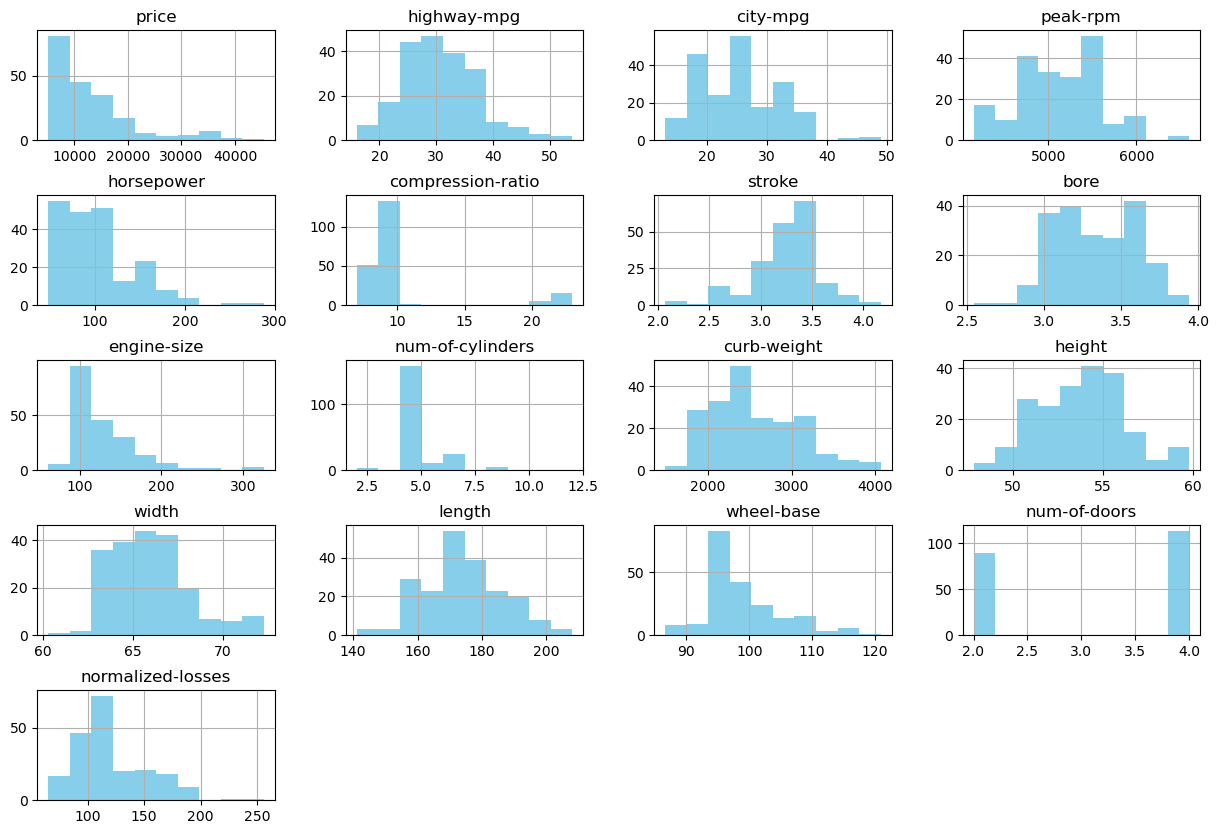

In [21]:
# Visualizing all of the cleaned graphs to see if there's any outliers that can affect our data

automobile.data.features.hist(figsize=(15, 10), color='skyblue')
plt.subplots_adjust(hspace=0.5)
plt.show()